# What is Multivariate Analysis?

Multivariate analysis deals with the statistical analysis of data collected on more than one dependent variable. These variables may be correlated with each other, and their statistical dependence is often taken into account when analyzing such data.It is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. 

# Import the necessary Libraries and Packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the Dataset:

In [3]:
train=pd.read_csv('Downloads/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Finding the correlations between the features using Heatmap:

In [5]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# What is a Heatmap?

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.


The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

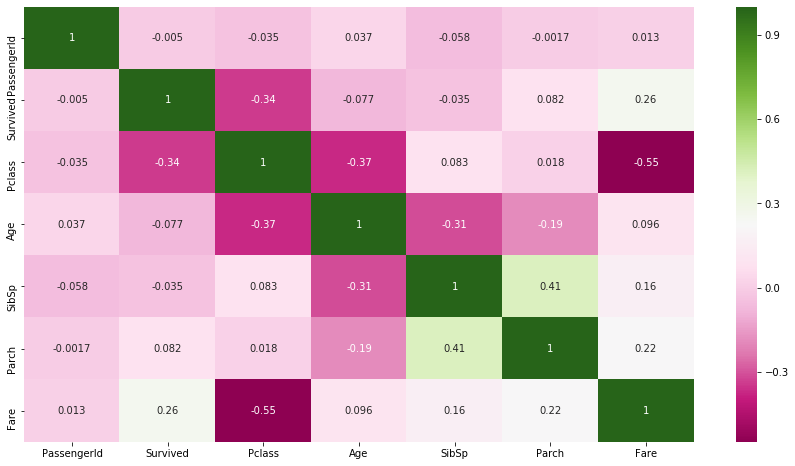

In [6]:
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap='PiYG')

## Positive Correlation Features:

**Fare and Survived:0.26**

There is a positive correlation between fare and survived meaning the passengers who paid more amount of fare had a higher chance of survival.

## Negative Correlation Features:

**Sex and Survived: -0.55**

This is the information about the passenger being a male or a female.



**Pclass and Survived: -0.33**

Higher the Class, lower the rate of survival
Eg: If the class is 3, then the respective passenger will have the least chance of survival.

# Does Age have an impact on Survival Rate for each Sex and Class group?

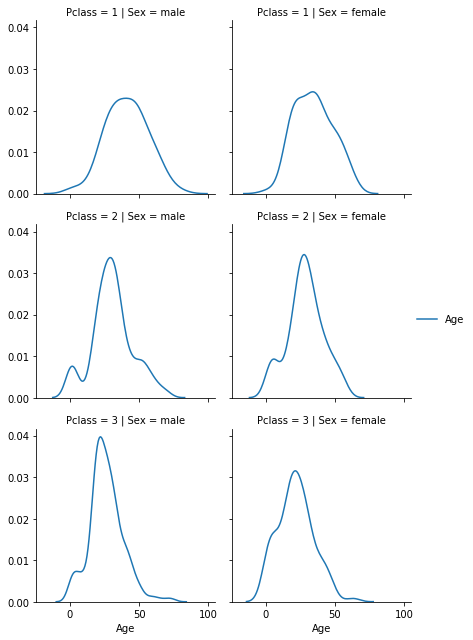

In [7]:
sns.FacetGrid(data=train,row='Pclass',col='Sex').map(sns.kdeplot,"Age").add_legend()

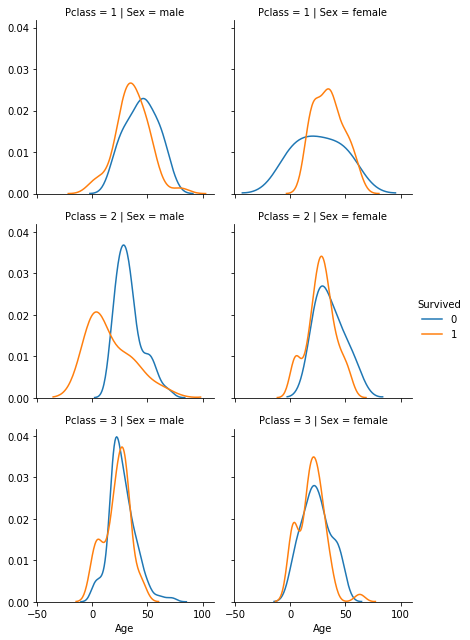

In [8]:
sns.FacetGrid(data=train,row='Pclass',col='Sex' ,hue='Survived').map(sns.kdeplot,"Age").add_legend()

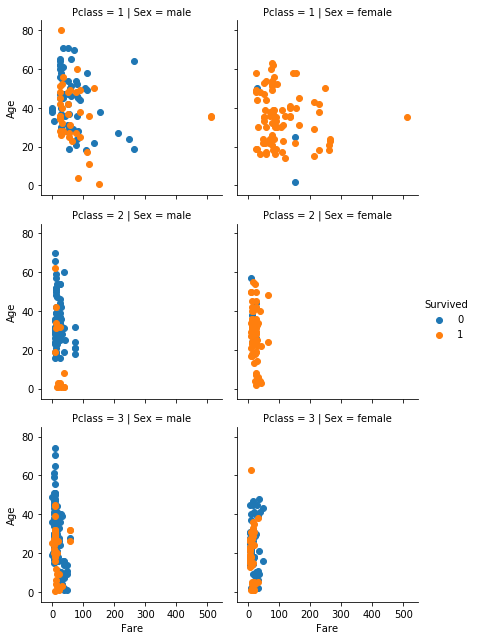

In [9]:
sns.FacetGrid(data=train,row='Pclass',col='Sex' ,hue='Survived').map(plt.scatter,"Fare","Age").add_legend()